In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

<Figure size 2000x200 with 0 Axes>

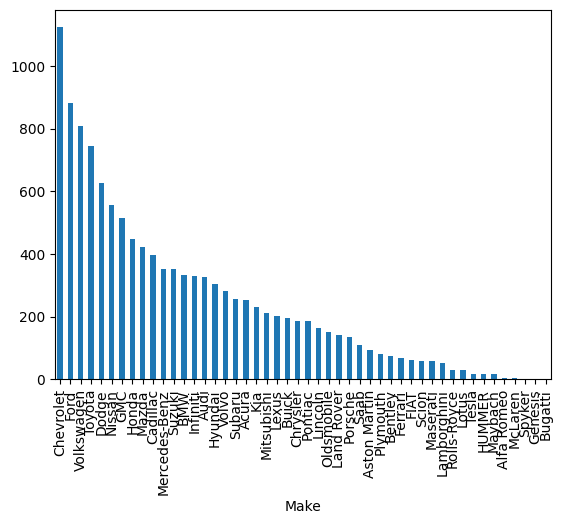

<Figure size 2000x200 with 0 Axes>

In [7]:
df['Make'].value_counts().plot(kind='bar')
plt.figure(figsize=(20, 2))

<Figure size 2000x200 with 0 Axes>

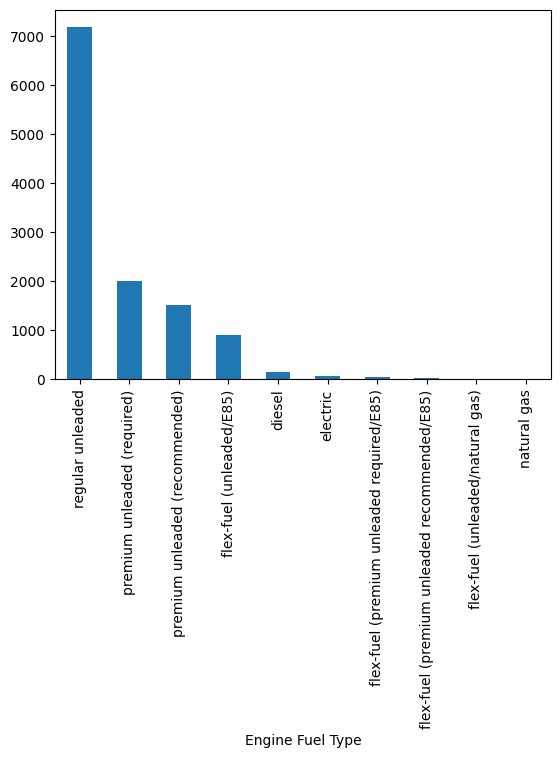

<Figure size 2000x200 with 0 Axes>

In [8]:
df['Engine Fuel Type'].value_counts().plot(kind='bar')
plt.figure(figsize=(20, 2))

<Figure size 2000x200 with 0 Axes>

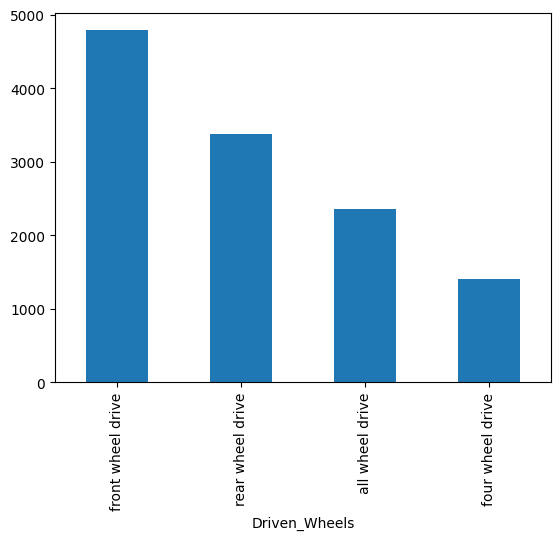

<Figure size 2000x200 with 0 Axes>

In [9]:
df['Driven_Wheels'].value_counts().plot(kind='bar')
plt.figure(figsize=(20, 2))

<Figure size 2000x200 with 0 Axes>

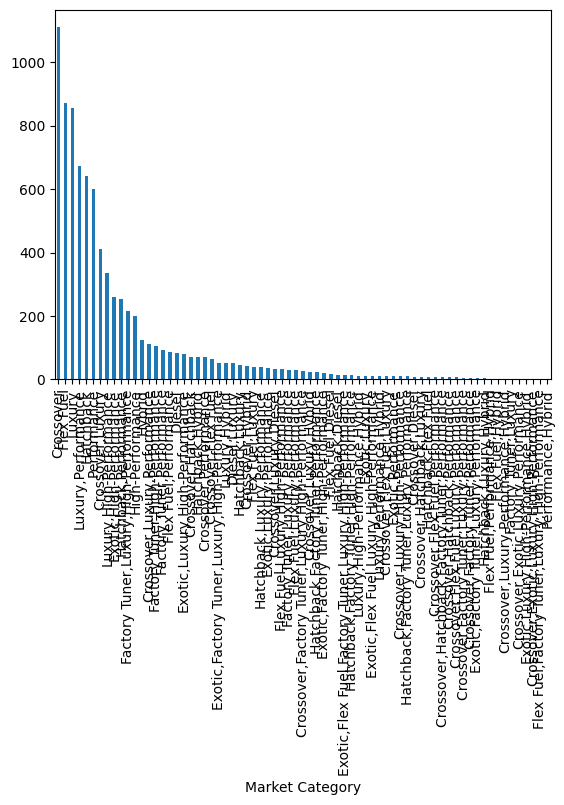

<Figure size 2000x200 with 0 Axes>

In [10]:
df['Market Category'].value_counts().plot(kind='bar')
plt.figure(figsize=(20, 2))

In [11]:
df['Market Category'].value_counts()

Market Category
Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Crossover,Exotic,Luxury,Performance                   1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Name: count, Length: 71, dtype: int64

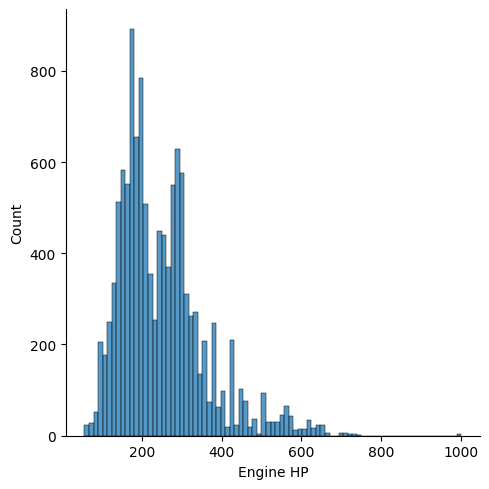

In [12]:
sns.displot(df['Engine HP'])

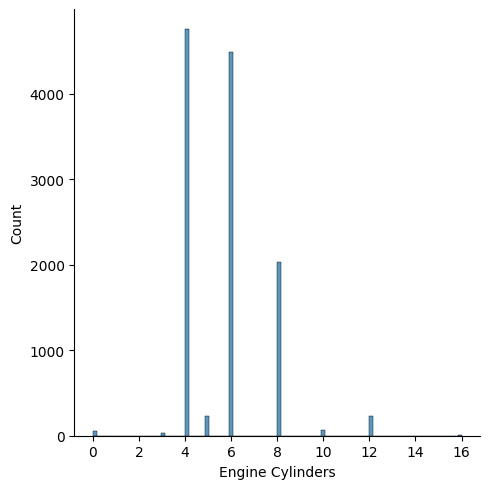

In [13]:
sns.displot(df['Engine Cylinders'])

In [14]:
df['Engine HP'].fillna(df['Engine HP'].mean(), inplace=True)

/var/folders/0z/84c9x8vs7z9dnrc5y6npqhqm0000gn/T/ipykernel_38412/2846301960.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine HP'].fillna(df['Engine HP'].mean(), inplace=True)


In [15]:
df['Engine Cylinders'].fillna(df['Engine Cylinders'].mean(), inplace=True)

/var/folders/0z/84c9x8vs7z9dnrc5y6npqhqm0000gn/T/ipykernel_38412/3959053558.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine Cylinders'].fillna(df['Engine Cylinders'].mean(), inplace=True)


In [16]:
df['Market Category'].fillna(df['Market Category'].mean(), inplace=True)

TypeError: can only concatenate str (not "int") to str

In [17]:
df['Factory Tuner'] = (df['Market Category'] == 'Factory Tuner').astype(int)
df['Luxury'] = (df['Market Category'] == 'Luxury').astype(int)
df['High-Performance'] = (df['Market Category'] == 'High-Performance').astype(int)

print(df)

          Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driv

In [18]:
df['Performance'] = (df['Market Category'] == 'Performance').astype(int)

In [19]:
df = df.drop(columns=['Market Category'])

In [20]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Factory Tuner,Luxury,High-Performance,Performance
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,0,0,0,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,0,0,0,0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,0,0,0,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,0,0,0,0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,0,1,0,0


In [21]:
columns_to_encode = ['Make', 'Engine Fuel Type','Transmission Type','Driven_Wheels','Vehicle Size','Vehicle Style']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(df[columns_to_encode])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))
df = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

In [22]:
df.head()

,Model,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Factory Tuner,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,1 Series M,2011,335.0,6.0,2.0,26,19,3916,46135,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1 Series,2011,300.0,6.0,2.0,28,19,3916,40650,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1 Series,2011,300.0,6.0,2.0,28,20,3916,36350,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1 Series,2011,230.0,6.0,2.0,28,18,3916,29450,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1 Series,2011,230.0,6.0,2.0,28,18,3916,34500,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df.corr()['MSRP']

ValueError: could not convert string to float: '1 Series M'

In [24]:
df['Model'].value_counts()

Model
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
                     ... 
MKZ Hybrid              1
M4 GTS                  1
LFA                     1
Horizon                 1
Zephyr                  1
Name: count, Length: 915, dtype: int64

In [25]:
correlation_with_price = df.drop(columns=['Model']).corr()['MSRP']
print(correlation_with_price)

Year                                0.227590
Engine HP                           0.661644
Engine Cylinders                    0.531272
Number of Doors                    -0.126635
highway MPG                        -0.160043
                                      ...   
Vehicle Style_Passenger Minivan    -0.047444
Vehicle Style_Passenger Van        -0.020077
Vehicle Style_Regular Cab Pickup   -0.075616
Vehicle Style_Sedan                -0.012916
Vehicle Style_Wagon                -0.057205
Name: MSRP, Length: 93, dtype: float64


In [26]:
df.drop(columns=['Model'], inplace=True)

In [35]:
x = df.drop(columns=['MSRP'])
y = np.log(df['MSRP'])

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [38]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [31]:
result = LinearRegression()
pipe = Pipeline([("regressor", result)])
pipe.fit(X_train, Y_train)
y_pred = pipe.predict(X_test)
print(r2_score(Y_test, y_pred))

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [32]:
has_nan = df.isna().any().any()
if has_nan:
    print("Yes")
else:
    print("No")

Yes


In [33]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    mean_value = df[col].mean() 
    df[col].fillna(mean_value, inplace=True)  

/var/folders/0z/84c9x8vs7z9dnrc5y6npqhqm0000gn/T/ipykernel_38412/1740256993.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


In [39]:
result = LinearRegression()
pipe = Pipeline([("regressor", result)])
pipe.fit(X_train, Y_train)
y_pred = pipe.predict(X_test)
print(r2_score(Y_test, y_pred))

0.7604804164540988


In [41]:
alpha_values = np.logspace(-3, 3, 7)  # Generates values from 0.001 to 1000
ridge_mse_results = []
lasso_mse_results = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, Y_train)
    ridge_predictions = ridge_model.predict(X_test)
    ridge_mse = mean_squared_error(Y_test, ridge_predictions)
    ridge_mse_results.append(ridge_mse)

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, Y_train)
    lasso_predictions = lasso_model.predict(X_test)
    lasso_mse = mean_squared_error(Y_test, lasso_predictions)
    lasso_mse_results.append(lasso_mse)

best_ridge_alpha = alpha_values[np.argmin(ridge_mse_results)]
best_ridge_mse = min(ridge_mse_results)

best_lasso_alpha = alpha_values[np.argmin(lasso_mse_results)]
best_lasso_mse = min(lasso_mse_results)

print("Best Ridge Alpha:", best_ridge_alpha)
print("Best Lasso Alpha:", best_lasso_alpha)

Best Ridge Alpha: 100.0
Best Lasso Alpha: 0.01


In [42]:
ridge_model = Ridge(alpha=100.0)  
ridge_model.fit(X_train, Y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_r2 = r2_score(Y_test, ridge_predictions)

lasso_model = Lasso(alpha=0.01)  
lasso_model.fit(X_train, Y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_r2 = r2_score(Y_test, lasso_predictions)

print("Ridge:", ridge_r2)
print("Lasso:", lasso_r2)

Ridge: 0.815080094821869
Lasso: 0.8141368644033469


In [43]:
max_depths = [1, 2, 3, 4, 5]
min_samples_splits = [2, 3, 4, 5]
min_samples_leaves = [1, 2, 3, 4]
max_features_options = [1, 2]  
criteria = ['squared_error', 'absolute_error', 'friedman_mse'] 

best_r2 = -np.inf
best_params = {}

for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            for max_features in max_features_options:
                for criterion in criteria:
                    dt_model = DecisionTreeRegressor(
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        max_features=max_features,
                        criterion=criterion,
                        random_state=42
                    )
                    dt_model.fit(X_train, Y_train)  
                    dt_predictions = dt_model.predict(X_test)  
                    r2 = r2_score(Y_test, dt_predictions)  
                    
                    if r2 > best_r2:
                        best_r2 = r2
                        best_params = {
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'max_features': max_features,
                            'criterion': criterion
                        }

print("Best R^2 Score for Decision Tree Regressor:", best_r2)
print("Best Hyperparameters:", best_params)

Best R^2 Score for Decision Tree Regressor: 0.3511352633641077
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1, 'criterion': 'squared_error'}


In [44]:
n_neighbors_options = [1, 2, 3, 4, 5] 
weights_options = ['uniform', 'distance']  

best_r2 = -np.inf
best_params = {}

for n_neighbors in n_neighbors_options:
    for weights in weights_options:
        knn_model = KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights
        )
        knn_model.fit(X_train, Y_train)
        knn_predictions = knn_model.predict(X_test)
        r2 = r2_score(Y_test, knn_predictions)
        
        if r2 > best_r2:
            best_r2 = r2
            best_params = {
                'n_neighbors': n_neighbors,
                'weights': weights
            }

print("Best R^2 Score for K-Neighbours Regressor:", best_r2)
print("Best Hyperparameters:", best_params)

Best R^2 Score for K-Neighbours Regressor: 0.9738261365024268
Best Hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}


In [45]:
n_estimators_options = [10, 50, 100]
max_depths = [None, 5, 10]
min_samples_splits = [2, 5]
best_r2_rf = -np.inf
best_params_rf = {}

for n_estimators in n_estimators_options:
    for max_depth in max_depths:
        for min_samples_split in min_samples_splits:
            rf_model = RandomForestRegressor(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                random_state=42
            )
            rf_model.fit(X_train, Y_train)
            rf_predictions = rf_model.predict(X_test)
            r2_rf = r2_score(Y_test, rf_predictions)
            
            if r2_rf > best_r2_rf:
                best_r2_rf = r2_rf
                best_params_rf = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split
                }

print("Best Random Forest R^2 Score:", best_r2_rf)
print("Best Random Forest Hyperparameters:", best_params_rf)

Best Random Forest R^2 Score: 0.9923930303271247
Best Random Forest Hyperparameters: {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 5}
